# Load Kedro

In [30]:
%reload_ext kedro.ipython

[10/18/25 19:20:44] INFO     Registered line magic '%reload_kedro'                                   ]8;id=19439;file:///Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=6492;file:///Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/kedro/ipython/__init__.py#63\63]8;;\

                    INFO     Registered line magic '%load_node'                                      ]8;id=219486;file:///Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=874887;file:///Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/kedro/ipython/__init__.py#65\65]8;;\

                    INFO     Resolved project path as:                                              ]8;id=91270;file:///Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=758944;file:///Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/kedro/ipython/__init__.py#180\180]8;;\
                             /Users/eoinmolloy/Documents/Documents/FPL-Modelling/fpl-modelling.                    
                             To set a different path, run '%reload_kedro <project_root>'                           

                    INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=482679;file:///Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=863787;file:///Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/kedro_telemetry/plugin.py#243\243]8;;\
                             the product. No personal data or IP addresses are stored on our side. To              
                             opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK` environment              
                             variables, or create a `.telemetry` file in the current working                       
                             directory with the contents `consent: false`. To hide this message,                   
                             explicitly grant or deny consent. Read more at                                        
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[10/18/25 19:20:45] INFO     Kedro project fpl_modelling                                            ]8;id=889253;file:///Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=331866;file:///Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/kedro/ipython/__init__.py#146\146]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=938568;file:///Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=711461;file:///Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/kedro/ipython/__init__.py#147\147]8;;\
                             'pipelines'                                                                           

# Imports

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import f_oneway

# Load data

In [32]:
p_hist = catalog.load("players_hist")

                    INFO     Loading data from players_hist (SQLTableDataset)...               ]8;id=34757;file:///Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=562449;file:///Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/kedro/io/data_catalog.py#1046\1046]8;;\

In [33]:
all_df = catalog.load("players_hist_merged")
all_df.head()

                    INFO     Loading data from players_hist_merged (SQLQueryDataset)...        ]8;id=249957;file:///Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=58232;file:///Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/kedro/io/data_catalog.py#1046\1046]8;;\

player_id web_name first_name  second_name        player_name  team_id  \
0          1     Raya      David  Raya Martín  David Raya Martín        1   
1          1     Raya      David  Raya Martín  David Raya Martín        1   
2          1     Raya      David  Raya Martín  David Raya Martín        1   
3          1     Raya      David  Raya Martín  David Raya Martín        1   
4          1     Raya      David  Raya Martín  David Raya Martín        1   

  players_team  opponent_team_id  opponent_team  was_home  ...  total_minutes  \
0      Arsenal                14        Man Utd         0  ...            630   
1      Arsenal                11          Leeds         1  ...            630   
2      Arsenal                12      Liverpool         0  ...            630   
3      Arsenal                16  Nott'm Forest         1  ...            630   
4      Arsenal                13       Man City         1  ...            630   

   total_points  total_transfers_in  total_transfers_out  position_id  \
0            34             1456575               649158            1   
1            34             1456575               649158            1   
2            34             1456575               649158            1   
3            34             1456575               649158            1   
4            34             1456575               649158            1   

   position_name  position_name_abbr  cumsum_minutes  cumsum_points  \
0     Goalkeeper                 GKP              90             10   
1     Goalkeeper                 GKP             180             16   
2     Goalkeeper                 GKP             270             18   
3     Goalkeeper                 GKP             360             24   
4     Goalkeeper                 GKP             450             26   

   cumsum_ict_index  
0               4.9  
1               6.2  
2               9.2  
3              10.5  
4              12.6  

[5 rows x 31 columns]

Data Transformations at start

In [34]:
# Shift round points as we need to predict next round using previous round to avoid data leakage
shift_to_next_week_cols = [
    'round_points',
    'opponent_team',
    'was_home'
]
for shift_to_next_week_col in shift_to_next_week_cols:

    all_df[f"next_week_{shift_to_next_week_col}"] = all_df.groupby('player_id')[shift_to_next_week_col].shift(-1)

all_df['accumulated_minutes'] = all_df.groupby('player_id')['round_minutes'].cumsum()

# all_df['fixture_difficulty'] = np.where(
#     all_df['was_home'] == 1,
#     all_df['players_team_strength_home'] - all_df['opponent_team_strength_away'],
#     all_df['players_team_strength_away'] - all_df['opponent_team_strength_home']
# )

# next_gw_cols = [
#     'players_team_strength',
#     'players_team_strength_home',
#     'players_team_strength_away',
#     'opponent_team_strength',
#     'opponent_team_strength_home',
#     'opponent_team_strength_away',
#     'fixture_difficulty'
# ]

# shift them -1 within each player to align next GW features with current GW
# for col in next_gw_cols:
#     all_df[f'next_{col}'] = all_df.groupby('player_id')[col].shift(-1)


# EDA

##  Play time of Players

Get dataframe of unique players

In [35]:
p_unique_df_all = all_df.drop_duplicates(subset='player_id', keep='last')

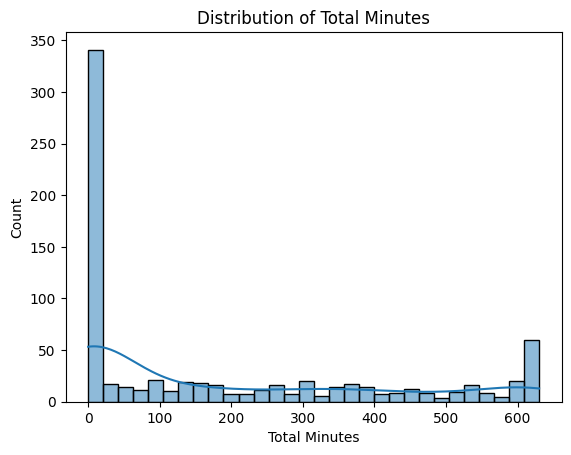

In [36]:


sns.histplot(p_unique_df_all['total_minutes'], bins=30, kde=True)
plt.title('Distribution of Total Minutes')
plt.xlabel('Total Minutes')
plt.ylabel('Count')
plt.show()


Most players havent played any minute giving a right skewed distribution, and there is a spike around 600 minutes for players who have played in most games

### Remove any player who hasnt played a game

In [37]:
num_all_players = all_df['player_id'].nunique()
num_players_no_mins = all_df.loc[all_df['total_minutes'] > 0, 'player_id'].nunique()
print(f'Removing {num_players_no_mins} from {num_all_players} total players leaving {num_all_players-num_players_no_mins} players left')
df = all_df[all_df['total_minutes']>0]

model_df = all_df.dropna(subset='next_week_round_points')



Removing 429 from 743 total players leaving 314 players left


In [38]:
p_unique_df = df.drop_duplicates(subset='player_id', keep='last')

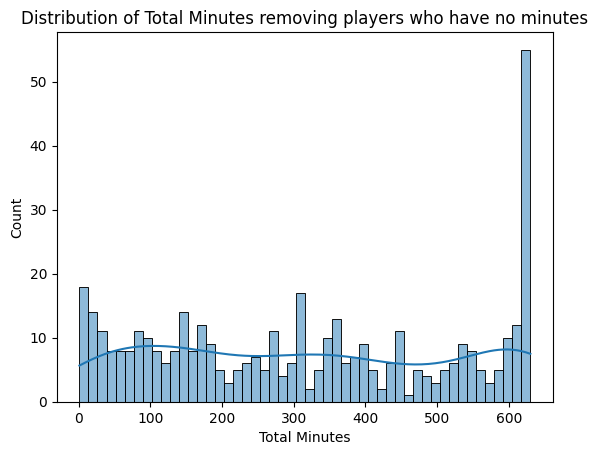

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(p_unique_df['total_minutes'], bins=50, kde=True)
plt.title('Distribution of Total Minutes removing players who have no minutes')
plt.xlabel('Total Minutes')
plt.ylabel('Count')
plt.show()


Now we see the more prominent spike of players who have played most minutes in games giving a left skewed distribution

## Target Variable Univariate Analysis: Total Points

### Distribution

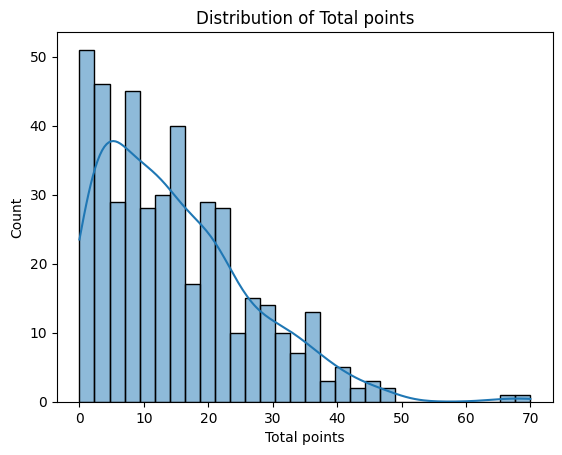

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(p_unique_df['total_points'], bins=30, kde=True)
plt.title('Distribution of Total points')
plt.xlabel('Total points')
plt.ylabel('Count')
plt.show()


- Total points is also a right skewed distribution with most players not having many points
- we can try a log transformation to see if this will result in a normal distribution

                    WARNING  /var/folders/5g/y4dx7m714l7ft2p__s3ybpn80000gn/T/ipykernel_89452/10166 ]8;id=182642;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=117332;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             03022.py:1: SettingWithCopyWarning:                                                   
                                                                                                                   
                                                                                                                   
                             A value is trying to be set on a copy of a slice from a DataFrame.                    
                             Try using .loc = value instead                                                        
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                                                                                                                   
                                                                                                                   

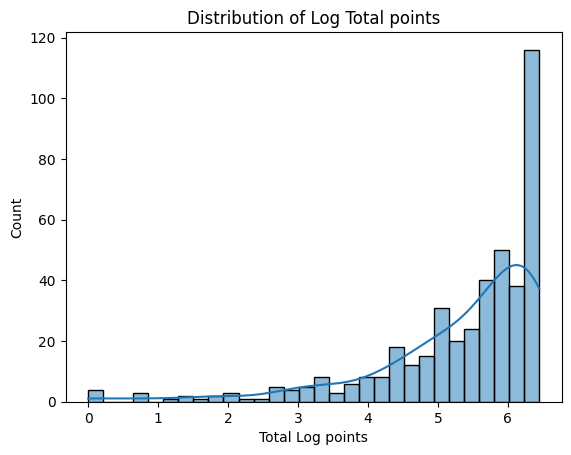

In [41]:
p_unique_df['log_total_minutes'] = np.log(p_unique_df['total_minutes'])

sns.histplot(p_unique_df['log_total_minutes'], bins=30, kde=True)
plt.title('Distribution of Log Total points')
plt.xlabel('Total Log points')
plt.ylabel('Count')
plt.show()


A log transformation actually gives a left skewed distribution instead so it may not be too useful

                    WARNING  /var/folders/5g/y4dx7m714l7ft2p__s3ybpn80000gn/T/ipykernel_89452/19536 ]8;id=522470;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=859186;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             93017.py:4: SettingWithCopyWarning:                                                   
                                                                                                                   
                                                                                                                   
                             A value is trying to be set on a copy of a slice from a DataFrame.                    
                             Try using .loc = value instead                                                        
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                                                                                                                   
                                                                                                                   

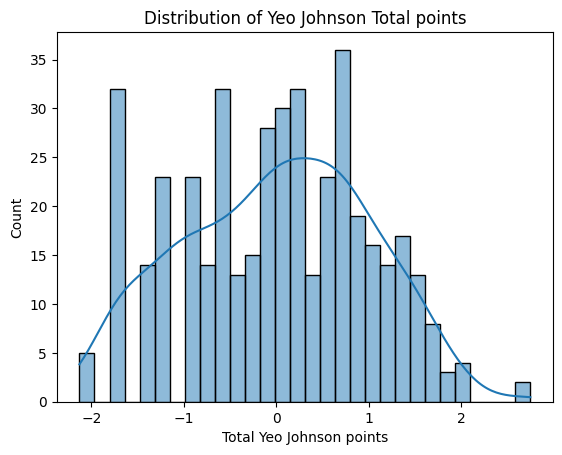

In [42]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
p_unique_df['yj_total_minutes'] = pt.fit_transform(p_unique_df[['total_points']])

sns.histplot(p_unique_df['yj_total_minutes'], bins=30, kde=True)
plt.title('Distribution of Yeo Johnson Total points')
plt.xlabel('Total Yeo Johnson points')
plt.ylabel('Count')
plt.show()

### Outliers

In [43]:
import plotly.express as px

def plot_box_with_hover(df, col, id_col='player_id'):
    fig = px.box(
        df,
        y=col,
        points="outliers",               # show only outliers
        hover_data=[id_col]              # show player_id on hover
    )
    fig.update_layout(
        title=f"Boxplot of {col} with Outliers Hover Info",
        yaxis_title=col,
        xaxis_title=""
    )
    fig.show()


In [44]:
p_unique_df['player_name']


6                  David Raya Martín
34      Gabriel dos Santos Magalhães
41                    William Saliba
48                Riccardo Calafiori
55                    Jurriën Timber
                    ...             
5034                Christantus Uche
5038                   Senne Lammens
5042                    Dilane Bakwa
5046                 Bertrand Traoré
5050            Gianluigi Donnarumma
Name: player_name, Length: 429, dtype: object

In [45]:
plot_box_with_hover(p_unique_df, col='total_points', id_col='player_name')


## Bivariate Analysis of Round Points

### Numerical Features

#### Correlation Matrix

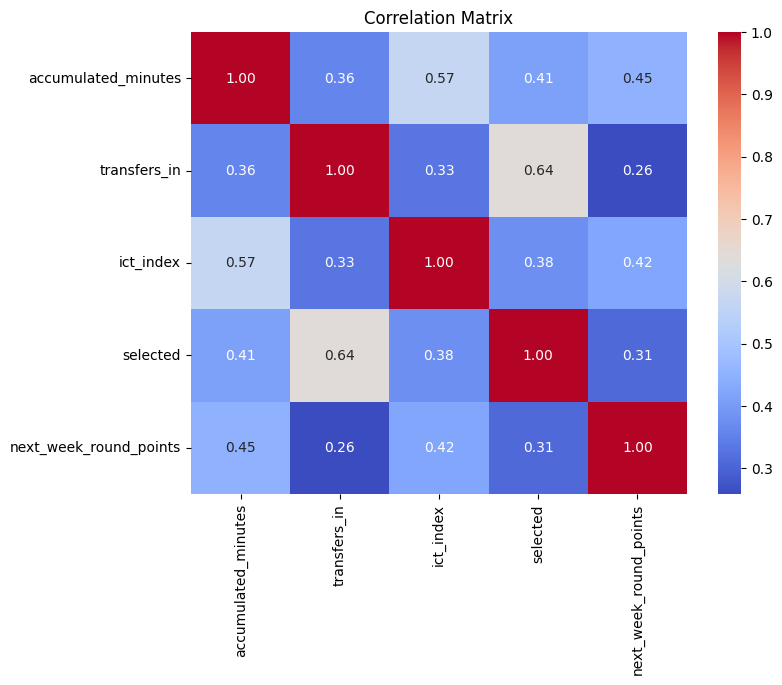

In [46]:
numerical_feature_cols = [
    'accumulated_minutes',
    'transfers_in',
    'ict_index',
    'selected'
]
target_col = 'next_week_round_points'

# Select relevant columns
corr_df = model_df[numerical_feature_cols + [target_col]]

# Compute correlation matrix
corr_matrix = corr_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()


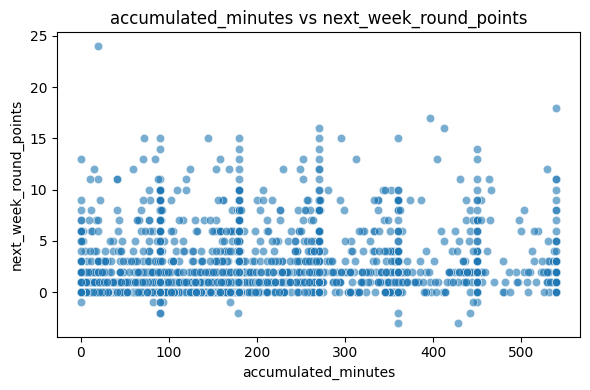

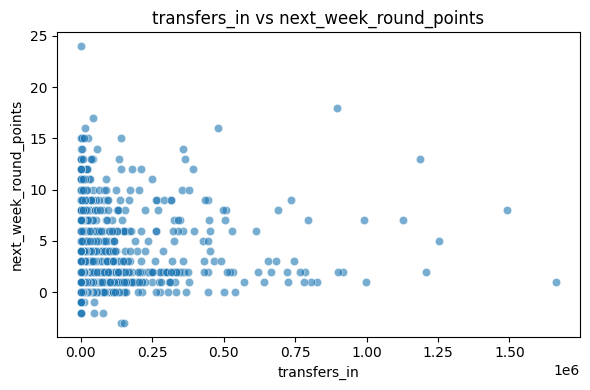

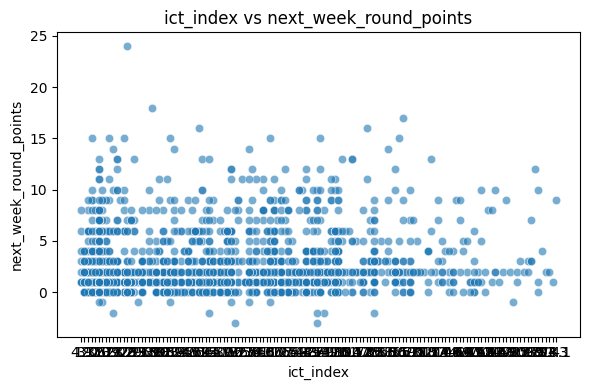

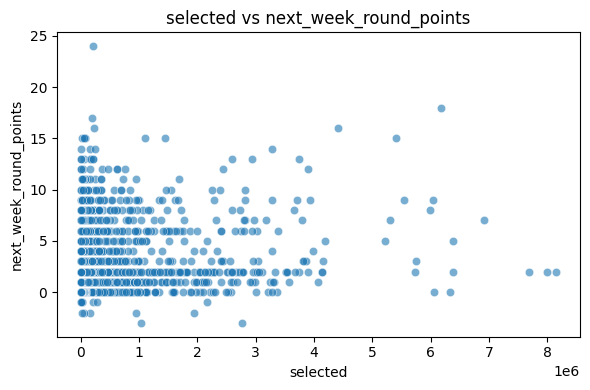

In [47]:
for feature in numerical_feature_cols:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=feature, y=target_col, data=model_df, alpha=0.6)
    plt.title(f"{feature} vs {target_col}")
    plt.xlabel(feature)
    plt.ylabel(target_col)
    plt.tight_layout()
    plt.show()

### Categorial Features

In [48]:
categorical_feature_cols = [
    'next_week_was_home',
    'players_team',
    'next_week_opponent_team',
    'position_name',
]
target_col = 'next_week_round_points'


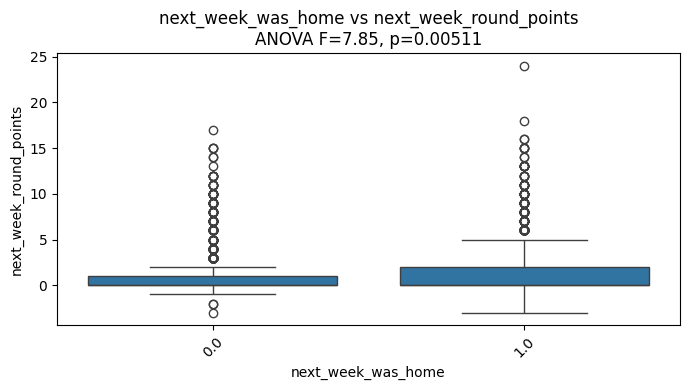

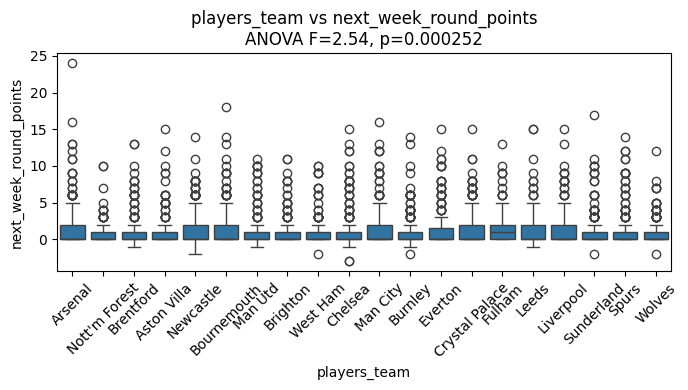

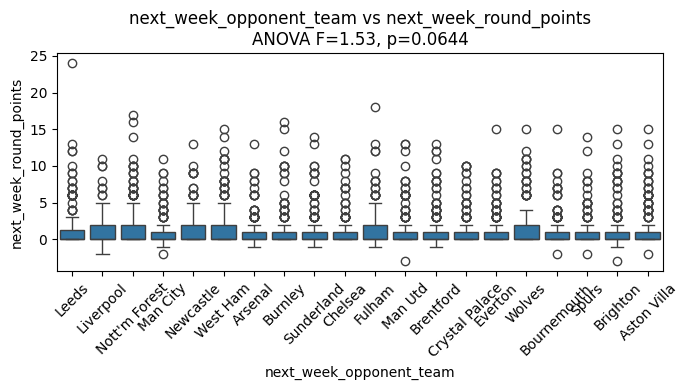

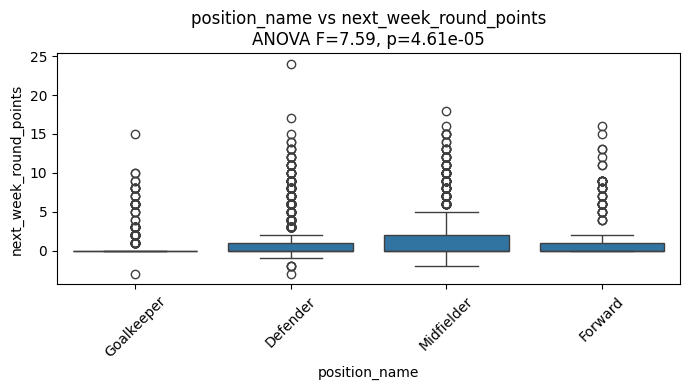

feature   F_value   p_value
0       next_week_was_home  7.847887  0.005111
3            position_name  7.593823  0.000046
1             players_team  2.538545  0.000252
2  next_week_opponent_team  1.533698  0.064437

In [49]:
anova_results = []

for col in categorical_feature_cols:
    # --- ANOVA test ---
    groups = [model_df[model_df[col] == cat][target_col] for cat in model_df[col].unique()]
    f_val, p_val = f_oneway(*groups)
    anova_results.append({'feature': col, 'F_value': f_val, 'p_value': p_val})

    # --- Boxplot ---
    plt.figure(figsize=(7, 4))
    sns.boxplot(x=col, y=target_col, data=model_df)
    plt.title(f"{col} vs {target_col}\nANOVA F={f_val:.2f}, p={p_val:.3g}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

anova_df = pd.DataFrame(anova_results).sort_values('F_value', ascending=False)
anova_df

All features except next week opponent team prove statistically singificant difference at > 99% confidence while next week opponent team proves at >90% confidence

# Modelling

## Prepare Train and Test Dataframes

In [50]:
print(f'We have up to gameweek {model_df['round'].max()+1} available which means we can use up to gameweek {model_df['round'].max()-2} for modelling')

We have up to gameweek 7 available which means we can use up to gameweek 4 for modelling


In [51]:
def prepare_df_at_gameweek(current_gameweek, arg_df, num_forecasted_games=1, 
                           target_col='next_week_round_points', num_test_gameweeks=1):
    """
    Build a dataset for a given gameweek, using features from each past gameweek to predict
    total points over the next `num_forecasted_games` gameweeks.

    The most recent `num_test_gameweeks` will be returned as test set, rest as training set.

    Returns:
        train_df, test_df
    """

    max_gw_in_data = arg_df['round'].max()+1

    # --- Sanity checks ---
    if current_gameweek > max_gw_in_data:
        raise ValueError(f"current_gameweek={current_gameweek} is beyond max round in data ({max_gw_in_data}).")

    if current_gameweek + num_forecasted_games > max_gw_in_data:
        raise ValueError(
            f"Not enough future gameweeks after GW{current_gameweek} "
            f"to forecast {num_forecasted_games} games. "
            f"Max available GW is {max_gw_in_data}."
        )

    Xs = []

    # Go backwards from current_gameweek down to 1
    for gw in range(current_gameweek, 0, -1):
        curr_X = arg_df[arg_df['round'] == gw].copy()

        # Define next gameweeks to sum for target
        next_weeks = list(range(gw + 1, gw + 1 + num_forecasted_games))

        # Stop early if any next week exceeds available rounds
        if any(nw > max_gw_in_data for nw in next_weeks):
            continue  # skip gameweeks without full future info

        target_data = arg_df[arg_df['round'].isin(next_weeks)][['player_id', target_col]]

        # Sum future points per player
        curr_y = target_data.groupby('player_id')[target_col].sum().reset_index(name='target')

        # Merge features and target
        merged = pd.merge(curr_X, curr_y, on='player_id', how='inner')
        merged['source_gw'] = gw
        Xs.append(merged)

    if not Xs:
        raise ValueError(
            f"No valid gameweeks to process for current_gameweek={current_gameweek} "
            f"and num_forecasted_games={num_forecasted_games}. Try reducing num_forecasted_games."
        )

    # Combine all GWs
    df_all = pd.concat(Xs, ignore_index=True)

    # Split into train/test
    max_gw = df_all['source_gw'].max()
    test_gws = list(range(max_gw, max_gw - num_test_gameweeks, -1))

    test_df = df_all[df_all['source_gw'].isin(test_gws)].reset_index(drop=True)
    train_df = df_all[~df_all['source_gw'].isin(test_gws)].reset_index(drop=True)

    # Return None if no training data
    if train_df.empty:
        train_df = None

    return train_df, test_df


In [52]:
train_df, test_df = prepare_df_at_gameweek(current_gameweek=6, arg_df=model_df)
                       

# Model Selection and Evaluation

In [53]:
features = numerical_feature_cols+categorical_feature_cols

## Walk Forward Cross Validation

In [54]:
def train_test_split(train_df, test_df, features, target):

    return train_df[features], train_df[target_col], test_df[features], test_df[target_col]

In [58]:
model_df['round'].nunique()

6

In [59]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.linear_model import ElasticNet, PoissonRegressor, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import TimeSeriesSplit
from skopt import BayesSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error
import numpy as np
import pandas as pd
from skopt.space import Real, Integer, Categorical

# FEATURES

all_features = numerical_feature_cols + categorical_feature_cols

# COLUMN TRANSFORMER
preprocessor = ColumnTransformer(
    transformers=[
        ("num", RobustScaler(), numerical_feature_cols),
        ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_feature_cols)
    ]
)

# MODELS AND PARAM SPACES
models = {
    "ElasticNet": {
        "model": ElasticNet(),
        "param_space": {
            "model__alpha": (0.01, 10.0, "log-uniform"),
            "model__l1_ratio": (0.0, 1.0)
        },
        "scale": True
    },
    "Ridge": {
        "model": Ridge(),
        "param_space": {"model__alpha": (0.01, 10.0, "log-uniform")},
        "scale": True
    },

    "KNN": {
        "model": KNeighborsRegressor(),
        "param_space": {"model__n_neighbors": (2, 20)},
        "scale": True
    },
    "RandomForestRegressor": {
        "model": RandomForestRegressor(random_state=42),
        "param_space": {"model__n_estimators": (50, 300), "model__max_depth": (3, 15)},
        "scale": False
    },
    "GradientBoostingRegressor": {
        "model": GradientBoostingRegressor(random_state=42),
        "param_space": {
    "model__n_estimators": Integer(50, 1000),
    "model__max_depth": Integer(2, 15),
    "model__learning_rate": Real(1e-3, 0.5, prior="log-uniform"),
    "model__min_samples_split": Integer(2, 50),
    "model__min_samples_leaf": Integer(1, 50),
    "model__subsample": Real(0.5, 1.0),
    "model__max_features": Categorical(["sqrt", "log2", None]),
    "model__loss": Categorical(["squared_error", "huber", "absolute_error"]),
    "model__alpha": Real(0.7, 0.99)
},
        "scale": False
    },
    "XGBRegressor": {
        "model": XGBRegressor(objective='reg:squarederror', random_state=42),
        "param_space": {
    "model__n_estimators": Integer(50, 2000),
    "model__max_depth": Integer(2, 15),
    "model__learning_rate": Real(5e-4, 0.5, prior="log-uniform"),
    "model__subsample": Real(0.4, 1.0),
    "model__colsample_bytree": Real(0.4, 1.0),
    "model__colsample_bylevel": Real(0.4, 1.0),
    "model__reg_alpha": Real(1e-8, 100.0, prior="log-uniform"),
    "model__reg_lambda": Real(1e-8, 100.0, prior="log-uniform"),
    "model__min_child_weight": Integer(1, 20),
    "model__gamma": Real(0.0, 10.0),
    "model__booster": Categorical(["gbtree"])
},
        "scale": False
    },
    "LGBMRegressor": {
        "model": LGBMRegressor(random_state=42),
        "param_space": {"model__n_estimators": (50, 300), "model__max_depth": (3, 15), "model__learning_rate": (0.01, 0.3, "log-uniform")},
        "scale": False
    },
    "CatBoostRegressor": {
        "model": CatBoostRegressor(random_state=42, verbose=0),
        "param_space": {"model__iterations": (50, 300), "model__depth": (3, 10), "model__learning_rate": (0.01, 0.3, "log-uniform")},
        "scale": False
    }
}

# STORAGE FOR RESULTS
results = []

# NAIVE BASELINE: predict mean target from training set
def naive_baseline(y_train, y_test):
    pred = np.full_like(y_test, y_train.mean(), dtype=float)
    return {
        "test_r2": r2_score(y_test, pred),
        "test_mae": mean_absolute_error(y_test, pred),
        "test_rmse": root_mean_squared_error(y_test, pred),
        "test_mape": np.mean(np.abs((y_test - pred)/y_test))*100
    }

# LOOP THROUGH GAMEWEEKS AND MODELS
for gw in range(2, model_df['round'].nunique()+1):  # example gameweeks
    train_df, test_df = prepare_df_at_gameweek(current_gameweek=gw, arg_df=model_df)
    
    X_train = train_df[all_features]
    y_train = train_df['target']
    X_test = test_df[all_features]
    y_test = test_df['target']
    
    # Add naive baseline first
    naive_metrics = naive_baseline(y_train, y_test)
    naive_metrics.update({"model": "NaiveMean", "gameweek": gw, "best_params": None})
    results.append(naive_metrics)
    
    for model_name, mp in models.items():
        # PIPELINE
        if mp["scale"]:
            pipeline = Pipeline([("preprocessor", preprocessor), ("model", mp["model"])])
        else:
            preproc_no_scale = ColumnTransformer(
                transformers=[("cat", OneHotEncoder(handle_unknown="ignore"), categorical_feature_cols)],
                remainder="passthrough"
            )
            pipeline = Pipeline([("preprocessor", preproc_no_scale), ("model", mp["model"])])
        
        # TIME SERIES SPLIT
        tscv = TimeSeriesSplit(n_splits=max(2, gw-1))
        
        # BAYESIAN OPTIMIZATION
        opt = BayesSearchCV(
            estimator=pipeline,
            search_spaces=mp["param_space"],
            cv=tscv,
            n_iter=30,
            scoring='neg_root_mean_squared_error',
            n_jobs=-1,
            random_state=42,
            verbose=1
        )
        
        opt.fit(X_train, y_train)
        y_pred_test = opt.best_estimator_.predict(X_test)
        
        results.append({
            "model": model_name,
            "gameweek": gw,
            "best_params": opt.best_params_,
            "test_r2": r2_score(y_test, y_pred_test),
            "test_rmse": root_mean_squared_error(y_test, y_pred_test),
            "test_mae": mean_absolute_error(y_test, y_pred_test),
            "test_mape": np.mean(np.abs((y_test - y_pred_test)/y_test))*100
        })

# CONVERT RESULTS TO DATAFRAME
results_df = pd.DataFrame(results)


Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits


/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.098e+03, tolerance: 2.940e-01
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.017e+02, tolerance: 1.058e-01
Linear regression models with a zero l1 penalization strength are more

Fitting 2 folds for each of 1 candidates, totalling 2 fits


/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.772e+02, tolerance: 1.058e-01
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.029e+03, tolerance: 2.940e-01
Linear regression models with a zero l1 penalization strength are more

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits


/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.305e+02, tolerance: 1.058e-01
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.182e+03, tolerance: 2.940e-01
Linear regression models with a zero l1 penalization strength are more

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits


/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.930e+02, tolerance: 2.940e-01
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.610e+02, tolerance: 1.058e-01
Linear regression models with a zero l1 penalization strength are more

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits


/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.936e+02, tolerance: 1.058e-01
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.341e+03, tolerance: 2.940e-01
Linear regression models with a zero l1 penalization strength are more

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fi

[10/18/25 19:22:16] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=220728;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=697855;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=419281;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=338017;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=399661;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=457261;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[10/18/25 19:22:17] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=977551;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=339391;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=749827;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=389022;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=573126;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=279937;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[10/18/25 19:22:18] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=511565;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=443033;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=25432;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=15677;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[10/18/25 19:22:19] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=592579;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=484048;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=792390;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=638353;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[10/18/25 19:22:20] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=575469;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=787822;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits


[10/18/25 19:22:28] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=443782;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=135032;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=464757;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=166386;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=257983;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=722557;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits


[10/18/25 19:22:29] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=313841;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=206103;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[10/18/25 19:22:30] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=884274;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=216355;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=300746;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=192844;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[10/18/25 19:22:31] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=209245;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=840972;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits


[10/18/25 19:22:32] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=713848;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=648282;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[10/18/25 19:22:33] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=727512;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=67199;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fi

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000160 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 153
[LightGBM] [Info] Number of data points in the train set: 230, number of used features: 21
[LightGBM] [Info] Start training from score 1.095652
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000238 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 290
[LightGBM] [Info] Number of data points in the train set: 460, number of used features: 37
[LightGBM] [Info] Start training from score 1.343478
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of tes

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000259 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 153
[LightGBM] [Info] Number of data points in the train set: 230, number of used features: 21
[LightGBM] [Info] Start training from score 1.095652
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000356 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 290
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of data points in the train set: 460, number of used features: 37
[LightGBM] [Info

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000144 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 290
[LightGBM] [Info] Number of data points in the train set: 460, number of used features: 37
[LightGBM] [Info] Start training from score 1.343478
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000293 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 290
[LightGBM] [Info] Number of data points in the train set: 460, number of used features: 37
[LightGBM] [Info] Start training from score 1.343478
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000236 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 153
[LightGBM] [Info] Number of data points in the train set: 230, number of used features: 21
[LightGBM] [Info] Start training from score 1.095652
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000251 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 153
[LightGBM] [Info] Number of data points in the train set: 230, number of used features: 21
[LightGBM] [Info] Start training from score 1.095652
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000244 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 290
[LightGBM] [Info] Number of data points in the train set: 460, number of used features: 37
[LightGBM] [Info] Start training from score 1.343478
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000154 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 153
[LightGBM] [Info] Number of data points in the train set: 230, number of used features: 21
[LightGBM] [Info] Start training from score 1.095652
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000234 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 153
[LightGBM] [Info] Number of data points in the train set: 230, number of used features: 21
[LightGBM] [Info] Start training from score 1.095652
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000130 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 153
[LightGBM] [Info] Number of data points in the train set: 230, number of used features: 21
[LightGBM] [Info] Start training from score 1.095652
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000188 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 290
[LightGBM] [Info] Number of data points in the train set: 460, number of used features: 37
[LightGBM] [Info] Start training from score 1.343478
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000197 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 153
[LightGBM] [Info] Number of data points in the train set: 230, number of used features: 21
[LightGBM] [Info] Start training from score 1.095652
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000194 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 290
[LightGBM] [Info] Number of data points in the train set: 460, number of used features: 37
[LightGBM] [Info] Start training from score 1.343478
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000143 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 290
[LightGBM] [Info] Number of data points in the train set: 460, number of used features: 37
[LightGBM] [Info] Start training from score 1.343478
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000207 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 153
[LightGBM] [Info] Number of data

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000551 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 153
[LightGBM] [Info] Number of data points in the train set: 230, number of used features: 21
[LightGBM] [Info] Start training from score 1.095652
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000185 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 290
[LightGBM] [Info] Number of data points in the train set: 460, number of used features: 37
[LightGBM] [Info

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000159 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 153
[LightGBM] [Info] Number of data points in the train set: 230, number of used features: 21
[LightGBM] [Info] Start training from score 1.095652
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000257 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 153
[LightGBM] [Info] Number of data points in the train set: 230, number of used features: 21
[LightGBM] [Info] Start training from score 1.095652
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000567 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 290
[LightGBM] [Info] Number of data points in the train set: 460, number of used features: 37
[LightGBM] [Info] Start training from score 1.343478
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000111 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 153
[LightGBM] [Info] Number of data points in the train set: 230, number of used features: 21
[LightGBM] [Info] Start training from score 1.095652
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000267 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 290
[LightGBM] [Info] Number of data points in the train set: 460, number of used features: 37
[LightGBM] [Info] Start training from score 1.343478
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000401 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 153
[LightGBM] [Info] Number of data points in the train set: 230, number of used features: 21
[LightGBM] [Info] Start training from score 1.095652
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000206 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 153
[LightGBM] [Info] Number of data points in the train set: 230, number of used features: 21
[LightGBM] [Info] Start training from score 1.095652
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000178 seconds.
You can set `force_col_wise=true` to remove the 

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000195 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 153
[LightGBM] [Info] Number of data points in the train set: 230, number of used features: 21
[LightGBM] [Info] Start training from score 1.095652
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000238 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 153
[LightGBM] [Info] Number of data points in the train set: 230, number of used features: 21
[LightGBM] [Info] Start training from score 1.095652
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000138 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 416
[LightGBM] [Info] Number of data points in the train set: 690, number of used features: 49
[LightGBM] [Info] Start training from score 1.326087
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

[10/18/25 19:23:39] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=666532;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=19686;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/sklearn/utils/validation.py:2749: UserWarning:                       
                                                                                                                   
                             X does not have valid feature names, but LGBMRegressor was fitted with                
                             feature names                                                                         
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fi

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.293e+02, tolerance: 2.903e-01
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.757e+03, tolerance: 5.167e-01
Linear regression models with a zero l1 penalization strength are more

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits


/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.999e+02, tolerance: 2.903e-01
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.697e+03, tolerance: 5.167e-01
Linear regression models with a zero l1 penalization strength are more

Fitting 2 folds for each of 1 candidates, totalling 2 fits


/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.899e+02, tolerance: 2.903e-01
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.859e+03, tolerance: 5.167e-01
Linear regression models with a zero l1 penalization strength are more

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits


/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.052e+03, tolerance: 2.903e-01
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.966e+03, tolerance: 5.167e-01
Linear regression models with a zero l1 penalization strength are more

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits


[10/18/25 19:24:05] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=815995;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=780258;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point [10.0] before, using random                 
                             point [0.5607018124300137]                                                            
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[10/18/25 19:24:06] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=356067;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=153990;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point [10.0] before, using random                 
                             point [0.09492748798592221]                                                           
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=188741;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=440597;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point [10.0] before, using random                 
                             point [0.036741441504281776]                                                          
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=787698;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=872129;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point [10.0] before, using random                 
                             point [4.551087824950215]                                                             
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=352306;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=419259;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point [10.0] before, using random                 
                             point [0.4102234151076511]                                                            
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=631902;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=869901;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point [10.0] before, using random                 
                             point [7.5664944212832355]                                                            
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[10/18/25 19:24:07] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=49408;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=837173;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point [10.0] before, using random                 
                             point [0.21628887669382754]                                                           
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=270660;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=388524;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point [10.0] before, using random                 
                             point [0.18940374900549087]                                                           
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=681486;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=501567;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point [10.0] before, using random                 
                             point [3.808733547462147]                                                             
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=818819;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=205031;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point [10.0] before, using random                 
                             point [0.03156275842049796]                                                           
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[10/18/25 19:24:08] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=272098;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=397647;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point [10.0] before, using random                 
                             point [0.05134917424386879]                                                           
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=562001;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=916047;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point [10.0] before, using random                 
                             point [0.01513903577740572]                                                           
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=556662;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=283859;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point [10.0] before, using random                 
                             point [2.0689823526251927]                                                            
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=615970;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=773960;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point [10.0] before, using random                 
                             point [0.023839605231744873]                                                          
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[10/18/25 19:24:09] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=656051;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=973791;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point [10.0] before, using random                 
                             point [0.014371127463664117]                                                          
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=992658;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=771094;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point [10.0] before, using random                 
                             point [0.05601691627860943]                                                           
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=385344;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=289645;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point [10.0] before, using random                 
                             point [2.805840506675025]                                                             
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fi

[10/18/25 19:24:12] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=448797;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=897087;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits


[10/18/25 19:24:13] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=607182;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=798524;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=796247;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=238516;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[10/18/25 19:24:14] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=841202;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=583787;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=523479;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=772334;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=981686;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=219674;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=567895;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=62923;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[10/18/25 19:24:15] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=457087;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=326073;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=83541;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=730192;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=979428;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=949037;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[10/18/25 19:24:16] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=298688;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=301345;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fi

[10/18/25 19:24:26] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=127219;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=307666;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits


[10/18/25 19:24:27] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=689048;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=575457;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[10/18/25 19:24:28] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=647385;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=686810;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=130314;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=651948;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[10/18/25 19:24:29] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=23619;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=876456;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits


[10/18/25 19:24:31] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=710669;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=460746;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=944071;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=722472;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[10/18/25 19:24:32] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=991843;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=826892;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fi

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000261 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 464
[LightGBM] [Info] Number of data points in the train set: 465, number of used features: 38
[LightGBM] [Info] Start training from score 1.378495
[L

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000201 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 700
[LightGBM] [Info] Number of data points in the train set: 930, number of used features: 50
[LightGBM] [Info] Start training from score 1.251613
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000157 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 464
[LightGBM] [Info] Number of data points in the train set: 465, number of used features: 38
[LightGBM] [Info] Start training from score 1.378495
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000200 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 464
[LightGBM] [Info] Number of data points in the train set: 465, number of used features: 38
[LightGBM] [Info] Start training from score 1.378495
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 700
[LightGBM] [Info] Number of data points in the train set: 930, number of used features: 50
[LightGBM] [Info] Start training from score 1.251613
[LightGBM] [Warning] No further splits with posit

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000256 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 464
[LightGBM] [Info] Number of data points in the train set: 465, number of used features: 38
[LightGBM] [Info] Start training from score 1.378495
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of tes

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000256 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 700
[LightGBM] [Info] Number of data points in the train set: 930, number of used features: 50
[LightGBM] [Info] Start training from score 1.251613
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000213 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 464
[LightGBM] [Info] Number of data points in the train set: 465, number of used features: 38
[LightGBM] [Info] Start training from score 1.378495
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000191 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 464
[LightGBM] [Info] Number of data points in the train set: 465, number of used features: 38
[LightGBM] [Info] Start training from score 1.378495
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000294 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 464
[LightGBM] [Info] Number of data points in the train set: 465, number of used features: 38
[LightGBM] [Info] Start training from score 1.378495
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of tes

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000237 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 700
[LightGBM] [Info] Number of data points in the train set: 930, number of used features: 50
[LightGBM] [Info] Start training from score 1.251613
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000266 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 464
[LightGBM] [Info] Number of data points in the train set: 465, number of used features: 38
[LightGBM] [Info] Start training from score 1.378495
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000283 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 700
[LightGBM] [Info] Number of data points in the train set: 930, number of used features: 50
[LightGBM] [Info] Start training from score 1.251613
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of tes

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000232 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 464
[LightGBM] [Info] Number of data points in the train set: 465, number of used features: 38
[LightGBM] [Info] Start training from score 1.378495
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000234 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 700
[LightGBM] [Info] Number of data points in the train set: 930, number of used features: 50
[LightGBM] [Info] Start training from score 1.251613
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000268 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 700
[LightGBM] [Info] Number of data points in the train set: 930, number of used features: 50
[LightGBM] [Info] Start training from score 1.251613
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000170 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 464
[LightGBM] [Info] Number of data points in the train set: 465, number of used features: 38
[LightGBM] [Info] Start training from score 1.378495
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000156 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 700
[LightGBM] [Info] Number of data points in the train set: 930, number of used features: 50
[LightGBM] [Info] Start training from score 1.251613
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000218 seconds.
You can set `force_col_wise=true` to remove the 

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000204 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 464
[LightGBM] [Info] Number of data points in the train set: 465, number of used features: 38
[LightGBM] [Info] Start training from score 1.378495
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000214 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 700
[LightGBM] [Info] Number of data points in the train set: 930, number of used features: 50
[LightGBM] [Info] Start training from score 1.251613
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000324 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 464
[LightGBM] [Info] Number of data points in the train set: 465, number of used features: 38
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Start training from score 1.378495
[LightGBM] [Warning] No further splits

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 700
[LightGBM] [Info] Number of data points in the train set: 930, number of used features: 50
[LightGBM] [Info] Start training from score 1.251613
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000265 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 464
[LightGBM] [Info] Number of data points in the train set: 465, number of used features: 38
[LightGBM] [Info] Start training from score 1.378495
[LightGBM] [Warning] No further splits with posit

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000225 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 464
[LightGBM] [Info] Number of data points in the train set: 465, number of used features: 38
[LightGBM] [Info] Start training from score 1.378495
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of tes

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 700
[LightGBM] [Info] Number of data points in the train set: 930, number of used features: 50
[LightGBM] [Info] Start training from score 1.251613
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000193 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 464
[LightGBM] [Info] Number of data points in the train set: 465, number of used features: 38
[LightGBM] [Info] Start training from score 1.378495
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000266 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 464
[LightGBM] [Info] Number of data points in the train set: 465, number of used features: 38
[LightGBM] [Info] Start training from score 1.378495
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000270 seconds.
You can set `force_col_wise=true` to remove the 

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000205 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 700
[LightGBM] [Info] Number of data points in the train set: 930, number of used features: 50
[LightGBM] [Info] Start training from score 1.251613
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000255 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 464
[LightGBM] [Info] Number of data points in the train set: 465, number of used features: 38
[LightGBM] [Info] Start training from score 1.378495
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000209 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 464
[LightGBM] [Info] Number of data points in the train set: 465, number of used features: 38
[LightGBM] [Info] Start training from score 1.378495
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000278 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 730
[LightGBM] [Info] Number of data points in the train set: 1395, number of used features: 50
[LightGBM] [Info] Start training from score 1.323297
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[10/18/25 19:26:00] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=369211;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=459124;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/sklearn/utils/validation.py:2749: UserWarning:                       
                                                                                                                   
                             X does not have valid feature names, but LGBMRegressor was fitted with                
                             feature names                                                                         
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fi

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.705e+02, tolerance: 2.645e-01
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.053e+03, tolerance: 5.667e-01
Linear regression models with a zero l1 penalization strength are more

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.206e+02, tolerance: 2.645e-01
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.954e+03, tolerance: 5.667e-01
Linear regression models with a zero l1 penalization strength are more

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.028e+03, tolerance: 2.645e-01
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.152e+03, tolerance: 5.667e-01
Linear regression models with a zero l1 penalization strength are more

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.080e+03, tolerance: 2.645e-01
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.252e+03, tolerance: 5.667e-01
Linear regression models with a zero l1 penalization strength are more

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

[10/18/25 19:26:26] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=653525;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=498276;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point [10.0] before, using random                 
                             point [0.023839605231744873]                                                          
                                                                                                                   
                                                                                                                   

Fitting 3 folds for each of 1 candidates, totalling 3 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=496873;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=273318;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point [10.0] before, using random                 
                             point [0.014371127463664117]                                                          
                                                                                                                   
                                                                                                                   

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[10/18/25 19:26:27] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=815100;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=852447;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point [10.0] before, using random                 
                             point [0.30137247015962443]                                                           
                                                                                                                   
                                                                                                                   

Fitting 3 folds for each of 1 candidates, totalling 3 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=632994;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=23348;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point [10.0] before, using random                 
                             point [2.805840506675025]                                                             
                                                                                                                   
                                                                                                                   

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[10/18/25 19:26:28] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=198311;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=630176;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point [10.0] before, using random                 
                             point [2.6405104663722323]                                                            
                                                                                                                   
                                                                                                                   

Fitting 3 folds for each of 1 candidates, totalling 3 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=241195;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=526075;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point [10.0] before, using random                 
                             point [0.14477461020783564]                                                           
                                                                                                                   
                                                                                                                   

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[10/18/25 19:26:30] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=383035;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=216867;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[10/18/25 19:26:32] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=859664;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=77986;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[10/18/25 19:26:33] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=541475;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=941329;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[10/18/25 19:26:34] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=596568;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=703131;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[10/18/25 19:26:35] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=188599;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=663120;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 3 folds for each of 1 candidates, totalling 3 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=956887;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=479983;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[10/18/25 19:26:36] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=90778;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=277145;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 3 folds for each of 1 candidates, totalling 3 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=630900;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=962293;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[10/18/25 19:26:37] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=90882;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=29966;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 3 folds for each of 1 candidates, totalling 3 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=632853;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=580159;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 3 folds for each of 1 candidates, totalling 3 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=655491;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=900327;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000306 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 1055, number of used features: 50
[LightGBM] [Info] Start training from score 1.226540
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000344 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 528
[LightGBM] [Info] Number of data points in the train set: 529, number of used features: 42
[LightGBM] [Info] Start training from score 1.172023
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000390 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 1055, number of used features: 50
[LightGBM] [Info] Start training from score 1.226540
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006420 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 803
[LightGBM] [Info] Number of data points in the train set: 1581, number of used features: 50
[LightGBM] [Info] Start training from score 1.218849
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002103 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 528
[LightGBM] [Info] Number of data points in the train set: 529, num

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Fitting 3 folds for each 

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000384 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 1055, number of used features: 50
[LightGBM] [Info] Start training from score 1.226540
[

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000189 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 528
[LightGBM] [Info] Number of data points in the train set: 529, number of used features: 42
[LightGBM] [Info] Start training from score 1.172023
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000152 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000160 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 528
[LightGBM] [Info] Number of data points in the train set: 529, number of used features: 42
[LightGBM] [Info] Start training from score 1.172023
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000213 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 1055, number of used features: 50
[LightGBM] [Info] Start training from score 1.226540
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000217 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 528
[LightGBM] [Info] Number of data points in the train set: 529, number of used features: 42
[LightGBM] [Info] Start training from score 1.172023
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-w

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000236 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 1055, number of used features: 50
[LightGBM] [Info] Start training from score 1.226540
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000162 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 803
[LightGBM] [Info] Number of data points in the train set: 1581, number of used features: 50
[LightGBM] [Info] Start training from score 1.218849
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Info] Auto-choosing col-wise 

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000750 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 528
[LightGBM] [Info] Number of data points in the train set: 529, number of used features: 42
[LightGBM] [Info] Start training from score 1.172023
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000558 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 1055, number of used features: 50
[LightGBM] [Info] Start training from score 1.226540
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-w

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000322 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 803
[LightGBM] [Info] Number of data points in the train set: 1581, number of used features: 50
[LightGBM] [Info] Start training from score 1.218849
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000357 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 1055, number of used features: 50
[LightGBM] [Info] Start training from score 1.226540
[LightGBM] [Warning] No further splits with pos

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001005 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 528
[LightGBM] [Info] Number of data points in the train set: 529, number of used features: 42
[LightGBM] [Info] Start training from score 1.172023
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000151 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 528
[LightGBM] [Info] Number of data points in the train set: 529, number of used features: 42
[LightGBM] [Info] Start training from score 1.172023
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of tes

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000131 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 528
[LightGBM] [Info] Number of data points in the train set: 529, number of used features: 42
[LightGBM] [Info] Start training from score 1.172023
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000286 seconds.
You can set `force_row_wise=true` to remove the 

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000602 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 803
[LightGBM] [Info] Number of data points in the train set: 1581, number of used features: 50
[LightGBM] [Info] Start training from score 1.218849
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000218 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 803
[LightGBM] [Info] Number of data points in the train set: 1581, number of used features: 50
[LightGBM] [Info] Start training from score 1.218849
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of te

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000136 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 528
[LightGBM] [Info] Number of data points in the train set: 529, number of used features: 42
[LightGBM] [Info] Start training from score 1.172023
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000174 seconds.
You can set `force_col_wise=true` to remove the 

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Info] Auto-choosing col-wise 

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000367 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 803
[LightGBM] [Info] Number of data points in the train set: 1581, number of used features: 50
[LightGBM] [Info] Start training from score 1.218849
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000132 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 528
[LightGBM] [Info] Number of data points in the train set: 529, number of used features: 42
[LightGBM] [Info] Start training from score 1.172023
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000178 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 1055, number of used features: 50
[LightGBM] [Inf

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000188 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 528
[LightGBM] [Info] Number of data points in the train set: 529, number of used features: 42
[LightGBM] [Info] Start training from score 1.172023
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000985 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in 

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000746 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 1055, number of used features: 50
[LightGBM] [Info] Start training from score 1.226540
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000279 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 528
[LightGBM] [Info] Number of data points in the train set: 529, number of used features: 42
[LightGBM] [Info] Start training from score 1.172023
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000392 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 1055, number of used features: 50
[LightGBM] [Info] Start training from score 1.226540
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000166 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 1055, number of used features: 50
[LightGBM] [Info] Start training from score 1.226540
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 819
[LightGBM] [Info] Number of data points in the train set: 2107, number of used features: 50
[LightGBM] [Info] Start training from score 1.265781
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[10/18/25 19:28:57] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=505194;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=522695;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/sklearn/utils/validation.py:2749: UserWarning:                       
                                                                                                                   
                             X does not have valid feature names, but LGBMRegressor was fitted with                
                             feature names                                                                         
                                                                                                                   
                                                                                                                   

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.069e+03, tolerance: 2.860e-01
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.149e+03, tolerance: 5.678e-01
Linear regression models with a zero l1 penalization strength are more

Fitting 4 folds for each of 1 candidates, totalling 4 fits


/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.733e+02, tolerance: 2.860e-01
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.973e+03, tolerance: 5.678e-01
Linear regression models with a zero l1 penalization strength are more

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits


/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.032e+03, tolerance: 2.860e-01
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.080e+03, tolerance: 5.678e-01
Linear regression models with a zero l1 penalization strength are more

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits


/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.137e+03, tolerance: 2.860e-01
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.287e+03, tolerance: 5.678e-01
Linear regression models with a zero l1 penalization strength are more

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits


/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.901e+02, tolerance: 2.860e-01
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.005e+03, tolerance: 5.678e-01
Linear regression models with a zero l1 penalization strength are more

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fi

[10/18/25 19:29:35] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=609605;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=878070;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 4 folds for each of 1 candidates, totalling 4 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=738621;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=62534;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 4 folds for each of 1 candidates, totalling 4 fits


[10/18/25 19:29:36] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=502195;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=642684;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 4 folds for each of 1 candidates, totalling 4 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=651527;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=738527;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 4 folds for each of 1 candidates, totalling 4 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=744864;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=831553;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 4 folds for each of 1 candidates, totalling 4 fits


[10/18/25 19:29:37] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=804517;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=887963;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 4 folds for each of 1 candidates, totalling 4 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=216269;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=376279;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 4 folds for each of 1 candidates, totalling 4 fits


[10/18/25 19:29:38] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=822375;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=89908;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 4 folds for each of 1 candidates, totalling 4 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=73450;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=872913;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 4 folds for each of 1 candidates, totalling 4 fits


[10/18/25 19:29:39] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=522584;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=991056;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 4 folds for each of 1 candidates, totalling 4 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=817097;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=316647;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits


[10/18/25 19:30:01] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=247688;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=115094;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits


[10/18/25 19:30:04] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=774322;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=840841;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 4 folds for each of 1 candidates, totalling 4 fits


[10/18/25 19:30:05] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=988032;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=572914;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fi

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Fitting 4 folds for each of 1 candidates, totalling 4 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000233 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 793
[LightGBM] [Info] Number of data points in the train set: 1140, number of used features: 50
[LightGBM] [Info] Start training from score 1.110526
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000378 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 914
[LightGBM] [Info] Number of data points in the train set: 1709, number of used features: 50
[LightGBM] [In

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000330 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 565
[LightGBM] [Info] Number of data points in the train set: 571, number of used features: 44
[LightGBM] [Info] Start training from score 1.089317
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000433 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 793
[LightGBM] [Info] Number of data points in the train set: 1140, number of used features: 50
[LightGBM] [Info] Start training from score 1.110526
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000641 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 914
[LightGBM] [Info] Number of data points in the train set: 1709, number of used features: 50
[LightGBM] [Info] Start training f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Fitting 4 folds for each of 1 candidates, totalling 4 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000192 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 565
[LightGBM] [Info] Number of data points in the train set: 571, number of used features: 44
[LightGBM] [Info] Start training from score 1.089317
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000374 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 793
[LightGBM] [Info] Number of data points in the train set: 1140, number of used features: 50
[LightGBM] [Info] Start training from score 1.110526
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Fitting 4 folds for each of 1 candidates, totalling 4 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000288 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 4 folds for each of 1 candidates, totalling 4 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000203 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 565
[LightGBM] [Info] Number of data points in the train set: 571, number of used features: 44
[LightGBM] [Info] Start training from score 1.089317
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000979 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 793
[LightGBM] [Info] Number of data

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 4 folds for each of 1 candidates, totalling 4 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000280 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 793
[LightGBM] [Info] Number of data points in the train set: 1140, number of used features: 50
[LightGBM] [Info] Start training from score 1.110526
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000389 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 565
[LightGBM] [Info] Number of data points in the train set: 571, number of used features: 44
[LightGBM] [Info] Start training from score 1.089317
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000332 seconds.
You can 

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 4 folds for each of 1 candidates, totalling 4 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000223 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 565
[LightGBM] [Info] Number of data points in the train set: 571, number of used features: 44
[LightGBM] [Info] Start training from score 1.089317
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000229 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 793
[LightGBM] [Info] Number of data points in the train set: 1140, number of used features: 50
[LightGBM] [Info] Start training from score 1.110526
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000306 seconds.
You can 

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 4 folds for each of 1 candidates, totalling 4 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000251 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 565
[LightGBM] [Info] Number of data points in the train set: 571, number of used features: 44
[LightGBM] [Info] Start training from score 1.089317
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000285 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 793
[LightGBM] [Info] Number of data points in the train set: 1140, number of used features: 50
[LightGBM] [Info] Start training from score 1.110526
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Fitting 4 folds for each of 1 candidates, totalling 4 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000245 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 4 folds for each of 1 candidates, totalling 4 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000186 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 793
[LightGBM] [Info] Number of data points in the train set: 1140, number of used features: 50
[LightGBM] [Info] Start training from score 1.110526
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000353 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 914
[LightGBM] [Info] Number of data points in the train set: 1709, number of used features: 50
[LightGBM] [Info] Start training from score 1.158572
[LightGBM] [Warning] No further spli

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 4 folds for each of 1 candidates, totalling 4 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000223 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 793
[LightGBM] [Info] Number of data points in the train set: 1140, number of used features: 50
[LightGBM] [Info] Start training from score 1.110526
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000356 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 914
[LightGBM] [Info] Number of dat

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 4 folds for each of 1 candidates, totalling 4 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000168 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 565
[LightGBM] [Info] Number of data points in the train set: 571, number of used features: 44
[LightGBM] [Info] Start training from score 1.089317
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 4 folds for each of 1 candidates, totalling 4 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000238 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 565
[LightGBM] [Info] Number of data points in the train set: 571, number of used features: 44
[LightGBM] [Info] Start training from score 1.089317
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000277 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 793
[LightGBM] [Info] Number of data points in the train set: 1140, number of used features: 50
[LightGBM] [Info] Start training from score 1.110526
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 4 folds for each of 1 candidates, totalling 4 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000268 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 565
[LightGBM] [Info] Number of data points in the train set: 571, number of used features: 44
[LightGBM] [Info] Start training from score 1.089317
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000440 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Total Bins 793
[LightGBM] [Info] Number of data points in the train set: 1140, number of used features: 50
[LightGBM] [Info] Start training from score 1.110526
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000445 seconds.
You can 

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 4 folds for each of 1 candidates, totalling 4 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000282 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 793
[LightGBM] [Info] Number of data points in the train set: 1140, number of used features: 50
[LightGBM] [Info] Start training from score 1.110526
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000585 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 565
[LightGBM] [Info] Number of data points in the train set: 571, number of used features: 44
[LightGBM] [Info] Start training from score 1.089317
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000307 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 914
[LightGBM] [Info] Number of data points in the train set: 1709, num

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Fitting 4 folds for each of 1 candidates, totalling 4 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000232 seconds.
You can set 

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 4 folds for each of 1 candidates, totalling 4 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000386 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 793
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000303 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Number of data points in the train set: 1140, number of used features: 50
[LightGBM] [Info] Total Bins 565
[LightGBM] [Info] Number of data points in the train set: 571, number of used features: 44
[LightGBM] [Info] Start training from score 1.110526
[LightGBM] [Info] Start training from score 1.089317
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000773 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 914
[LightGBM] [Info] Number of data points in the train set: 1709, num

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 4 folds for each of 1 candidates, totalling 4 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000393 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 793
[LightGBM] [Info] Number of data points in the train set: 1140, number of used features: 50
[LightGBM] [Info] Start training from score 1.110526
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000234 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 914
[LightGBM] [Info] Number of data points in the train set: 1709, number of used features: 50
[LightGBM] [Info] Start training from score 1.158572
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000529 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 565
[L

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 4 folds for each of 1 candidates, totalling 4 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000192 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 565
[LightGBM] [Info] Number of data points in the train set: 571, number of used features: 44
[LightGBM] [Info] Start training from score 1.089317
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 4 folds for each of 1 candidates, totalling 4 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000115 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 793
[LightGBM] [Info] Number of data points in the train set: 1140, number of used features: 50
[LightGBM] [Info] Start training from score 1.110526
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000239 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 565
[LightGBM] [Info] Number of data points in the train set: 571, number of used features: 44
[LightGBM] [Info] Start training from score 1.089317
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[10/18/25 19:33:12] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=472800;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=729906;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/sklearn/utils/validation.py:2749: UserWarning:                       
                                                                                                                   
                             X does not have valid feature names, but LGBMRegressor was fitted with                
                             feature names                                                                         
                                                                                                                   
                                                                                                                   

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fi

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.627e+02, tolerance: 2.512e-01
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.632e+03, tolerance: 4.631e-01
Linear regression models with a zero l1 penalization strength are more

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.239e+02, tolerance: 2.512e-01
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.727e+03, tolerance: 4.631e-01
Linear regression models with a zero l1 penalization strength are more

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.378e+02, tolerance: 2.512e-01
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.594e+03, tolerance: 4.631e-01
Linear regression models with a zero l1 penalization strength are more

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.832e+02, tolerance: 2.512e-01
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.829e+03, tolerance: 4.631e-01
Linear regression models with a zero l1 penalization strength are more

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.925e+02, tolerance: 2.512e-01
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.677e+03, tolerance: 4.631e-01
Linear regression models with a zero l1 penalization strength are more

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

[10/18/25 19:33:49] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=625208;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=721298;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 5 folds for each of 1 candidates, totalling 5 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=330868;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=175718;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 5 folds for each of 1 candidates, totalling 5 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=232882;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=510143;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[10/18/25 19:33:50] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=940578;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=265243;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 5 folds for each of 1 candidates, totalling 5 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=905565;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=384191;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[10/18/25 19:33:51] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=308826;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=57132;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 5 folds for each of 1 candidates, totalling 5 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=718155;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=964728;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 5 folds for each of 1 candidates, totalling 5 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=968569;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=567715;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[10/18/25 19:33:52] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=884102;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=611976;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 5 folds for each of 1 candidates, totalling 5 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=570194;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=391259;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

[10/18/25 19:34:14] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=406679;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=98477;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[10/18/25 19:34:24] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=363979;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=543500;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000459 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 777
[LightGBM] [Info] Number of data points in the train set: 951, number of used features: 50
[LightGBM] [Info] Start training from score 1.089380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of tes

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of data points in the train set: 951, number of used features: 50
[LightGBM] [Info] Start training from score 1.089380
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Fitting 5 folds for each 

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000283 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 777
[LightGBM] [Info] Number of data points in the train set: 951, number of used features: 50
[LightGBM] [Info] Start training from score 1.089380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000469 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 480
[LightGBM] [Info] Number of data points in the train set: 477, number of used features: 38
[LightGBM] [Info

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000269 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 480
[LightGBM] [Info] Number of data points in the train set: 477, number of used features: 38
[LightGBM] [Info] Start training from score 1.146751
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000333 seconds.
You can set `force_col_wise=true` to remove the 

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.ven

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000175 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 480
[LightGBM] [Info] Number of data points in the train set: 477, number of used features: 38
[LightGBM] [Info] Start training from score 1.146751
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000213 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 777
[LightGBM] [Info] Number of data points in the train set: 951, number of used features: 50
[LightGBM] [Info] Start training from score 1.089380
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.ven

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000156 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 480
[LightGBM] [Info] Number of data points in the train set: 477, number of used features: 38
[LightGBM] [Info] Start training from score 1.146751
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.ven

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000325 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 480
[LightGBM] [Info] Number of data points in the train set: 477, number of used features: 38
[LightGBM] [Info] Start training from score 1.146751
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000265 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 777
[LightGBM] [Info] Number of data points in the train set: 951, number of used features: 50
[LightGBM] [Info

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.ven

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000216 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 777
[LightGBM] [Info] Number of data points in the train set: 951, number of used features: 50
[LightGBM] [Info] Start training from score 1.089380
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.ven

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000281 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 480
[LightGBM] [Info] Number of data points in the train set: 477, number of used features: 38
[LightGBM] [Info] Start training from score 1.146751
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000499 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 816
[LightGBM] [Info] Number of data points in the train set: 1425, number of used features: 50
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000580 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [In

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.ven

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.ven

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000102 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 480
[LightGBM] [Info] Number of data points in the train set: 477, number of used features: 38
[LightGBM] [Info] Start training from score 1.146751
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.ven

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.ven

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000185 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 480
[LightGBM] [Info] Number of data points in the train set: 477, number of used features: 38
[LightGBM] [Info] Start training from score 1.146751
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.ven

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000190 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 480
[LightGBM] [Info] Number of data points in the train set: 477, number of used features: 38
[LightGBM] [Info] Start training from score 1.146751
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000437 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 777
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of data

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.ven

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.ven

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000365 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 480
[LightGBM] [Info] Number of data points in the train set: 477, number of used features: 38
[LightGBM] [Info] Start training from score 1.146751
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000319 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 777
[LightGBM] [Info] Number of data points in the train set: 951, number of used features: 50
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Start training from score 1.089380
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.ven

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.ven

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000275 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 777
[LightGBM] [Info] Number of data points in the train set: 951, number of used features: 50
[LightGBM] [Info] Start training from score 1.089380
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000209 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Total Bins 816
[LightGBM] [Info] Number of data points in the train set: 1425, number of used features: 50
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.00

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.ven

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.ven

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000261 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 480
[LightGBM] [Info] Number of data points in the train set: 477, number of used features: 38
[LightGBM] [Info] Start training from score 1.146751
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 777
[LightGBM] [Info] Number of data points in the train set: 951, number of used features: 50
[LightGBM] [Info] Start training from score 1.089380
[LightGBM] [Warning] No further splits

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.ven

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000201 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 480
[LightGBM] [Info] Number of data points in the train set: 477, number of used features: 38
[LightGBM] [Info] Start training from score 1.146751
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000299 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 777
[LightGBM] [Info] Number of data points in the train set: 951, number of used features: 50
[LightGBM] [Info] Start training from score 1.089380
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000285 seconds.
You can s

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.ven

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000398 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 777
[LightGBM] [Info] Number of data points in the train set: 951, number of used features: 50
[LightGBM] [Info] Start training from score 1.089380
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001350 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 927
[LightGBM] [Info] Number of data points in the train set: 1899, number of used features: 50
[LightGBM] [Info] Start training from score 1.201159
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.ven

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[10/18/25 19:37:50] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=363663;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=477170;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/sklearn/utils/validation.py:2749: UserWarning:                       
                                                                                                                   
                             X does not have valid feature names, but LGBMRegressor was fitted with                
                             feature names                                                                         
                                                                                                                   
                                                                                                                   

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [60]:
results_df.sort_values(by=['gameweek', 'test_rmse'])

test_r2  test_mae  test_rmse  test_mape                      model  \
5   0.271191  1.284242   2.099907        inf  GradientBoostingRegressor   
7   0.266207  1.335152   2.107074        inf              LGBMRegressor   
8   0.265573  1.339088   2.107985        inf          CatBoostRegressor   
4   0.254430  1.263302   2.123916        inf      RandomForestRegressor   
3   0.253622  1.251330   2.125066        inf                        KNN   
6   0.206367  1.306483   2.191305        inf               XGBRegressor   
1   0.137432  1.521646   2.284492        inf                 ElasticNet   
2   0.097355  1.536194   2.336961        inf                      Ridge   
0  -0.000005  1.706599   2.459768        inf                  NaiveMean   
15  0.222567  1.148955   1.978310        inf               XGBRegressor   
17  0.220638  1.235105   1.980763        inf          CatBoostRegressor   
16  0.209782  1.249228   1.994511        inf              LGBMRegressor   
13  0.189438  1.228048   2.020022        inf      RandomForestRegressor   
14  0.184912  1.254212   2.025654        inf  GradientBoostingRegressor   
12  0.166014  1.234551   2.049001        inf                        KNN   
10  0.042675  1.467206   2.195294        inf                 ElasticNet   
9  -0.005755  1.552087   2.250137        inf                  NaiveMean   
11 -0.042843  1.570385   2.291250        inf                      Ridge   
26  0.266431  1.082284   1.949801        inf          CatBoostRegressor   
22  0.259766  1.085140   1.958638        inf      RandomForestRegressor   
24  0.255666  1.082178   1.964055        inf               XGBRegressor   
25  0.255030  1.074511   1.964895        inf              LGBMRegressor   
23  0.254432  1.082763   1.965683        inf  GradientBoostingRegressor   
21  0.221396  1.134189   2.008761        inf                        KNN   
19  0.172648  1.307148   2.070690        inf                 ElasticNet   
20  0.133191  1.367215   2.119491        inf                      Ridge   
18 -0.004010  1.496489   2.281072        inf                  NaiveMean   
35  0.281960  1.107029   1.957495        inf          CatBoostRegressor   
33  0.281331  1.067169   1.958352        inf               XGBRegressor   
34  0.280067  1.106687   1.960074        inf              LGBMRegressor   
32  0.279764  1.088691   1.960486        inf  GradientBoostingRegressor   
31  0.274960  1.095100   1.967014        inf      RandomForestRegressor   
30  0.244103  1.133063   2.008434        inf                        KNN   
28  0.203360  1.323124   2.061851        inf                 ElasticNet   
29  0.163588  1.372330   2.112693        inf                      Ridge   
27 -0.000043  1.514651   2.310125        inf                  NaiveMean   
44  0.286154  1.096543   1.951770        inf          CatBoostRegressor   
42  0.283916  1.078233   1.954826        inf               XGBRegressor   
43  0.280292  1.106197   1.959767        inf              LGBMRegressor   
40  0.275087  1.095277   1.966841        inf      RandomForestRegressor   
41  0.262117  1.118688   1.984358        inf  GradientBoostingRegressor   
39  0.247818  1.122736   2.003493        inf                        KNN   
37  0.206866  1.323457   2.057309        inf                 ElasticNet   
38  0.163588  1.372330   2.112693        inf                      Ridge   
36 -0.000043  1.514651   2.310125        inf                  NaiveMean   

    gameweek                                        best_params  
5          2  {'model__alpha': 0.7316342558433893, 'model__l...  
7          2  {'model__learning_rate': 0.029758191010360438,...  
8          2  {'model__depth': 3, 'model__iterations': 50, '...  
4          2  {'model__max_depth': 3, 'model__n_estimators':...  
3          2                         {'model__n_neighbors': 16}  
6          2  {'model__booster': 'gbtree', 'model__colsample...  
1          2  {'model__alpha': 0.03582783018718291, 'model__...  
2          2              

In [ ]:
results_df[results_df['gameweek']==4].sort_values(by='test_rmse').iloc[0]['best_params']

OrderedDict({'model__booster': 'gbtree', 'model__colsample_bylevel': 0.8203728667728196, 'model__colsample_bytree': 0.922991157077929, 'model__gamma': 4.158210875794536, 'model__learning_rate': 0.006952873032336879, 'model__max_depth': 5, 'model__min_child_weight': 1, 'model__n_estimators': 773, 'model__reg_alpha': 0.008785958264239105, 'model__reg_lambda': 5.742011472489027e-07, 'model__subsample': 0.8604270021819085})

In [ ]:
p = catalog.load("players")
p['ict_index'] = pd.to_numeric(p['ict_index'], errors='coerce')
all_df['ict_index'] = pd.to_numeric(all_df['ict_index'], errors='coerce')

[10/14/25 21:50:48] INFO     Loading data from players (SQLTableDataset)...                    ]8;id=327462;file:///Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=904381;file:///Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/kedro/io/data_catalog.py#1046\1046]8;;\

In [ ]:
numerical_feature_cols

['accumulated_minutes', 'transfers_in', 'ict_index', 'selected_by_percent']

In [ ]:
all_df[all_df['player_name']=='Erling Haaland'][['round', 'round_minutes']]#['selected_by_percent'].sum()

round  round_minutes
3252      1             72
3253      2             90
3254      3             90
3255      4             86
3256      5             75
3257      6             90
3258      7             90

In [ ]:
all_df['sel']

In [ ]:
p[p['player_name']=='Erling Haaland'][['selected']]

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 p[p['player_name']=='Erling Haaland'][['selected']]                                          │
│   2                                                                                              │
│                                                                                                  │
│ /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/pandas/co │
│ re/frame.py:4113 in __getitem__                                                                  │
│                                                                                                  │
│    4110 │   │   else:                                                                            │
│    4111 │   │   │   if is_iterator(key):                                                         │
│    4112 │   │   │   │   key = list(key)                                                          │
│ ❱  4113 │   │   │   indexer = self.columns._get_indexer_strict(key, "columns")[1]                │
│    4114 │   │                                                                                    │
│    4115 │   │   # take() does not accept boolean indexers                                        │
│    4116 │   │   if getattr(indexer, "dtype", None) == bool:                                      │
│                                                                                                  │
│ /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/pandas/co │
│ re/indexes/base.py:6212 in _get_indexer_strict                                                   │
│                                                                                                  │
│   6209 │   │   else:                                                                             │
│   6210 │   │   │   keyarr, indexer, new_indexer = self._reindex_non_unique(keyarr)               │
│   6211 │   │                                                                                     │
│ ❱ 6212 │   │   self._raise_if_missing(keyarr, indexer, axis_name)                                │
│   6213 │   │                                                                                     │
│   6214 │   │   keyarr = self.take(indexer)                                                       │
│   6215 │   │   if isinstance(key, Index):                                                        │
│                                                                                                  │
│ /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/pandas/co │
│ re/indexes/base.py:6261 in _raise_if_missing                                                     │
│                                                                                                  │
│   6258 │   │                                                                                     │
│   6259 │   │   if nmissing:                                                                      │
│   6260 │   │   │   if nmissing == len(indexer):                                                  │
│ ❱ 6261 │   │   │   │   raise KeyError(f"None of [{key}] are in the [{axis_name}]")               │
│   6262 │   │   │                                                                                 │
│   6263 │   │   │   not_found = list(ensure_index(key)[missing_mask.nonzero()[0]].unique())       │
│   6264 │   │   │   raise KeyError(f"{not_found} not in index")                                   │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
KeyError: "None of [Index(['selected'], dtype='object')] are 

In [ ]:
p.sort_values(by='ict_index', ascending=False)[['player_name', 'ict_index']][0:50]

player_name  ict_index
player_id                                                
430                             Erling Haaland       76.8
82                             Antoine Semenyo       65.0
419                              Jack Grealish       64.5
449                     Bruno Borges Fernandes       59.7
582                             Mohammed Kudus       55.5
119                               Bryan Mbeumo       53.8
384                                 Cody Gakpo       52.6
8                               Jurriën Timber       49.8
160                             Yankuba Minteh       49.6
200                             Jaidon Anthony       49.4
381                              Mohamed Salah       49.2
237                             Enzo Fernández       48.9
299                              Iliman Ndiaye       46.4
612             Lucas Tolentino Coelho de Lima       45.0
624                               Jarrod Bowen       43.8
249              João Pedro Junqueira de Jesus       40.6
21                                 Declan Rice       40.5
303                               James Garner       40.5
666                            Viktor Gyökeres       40.2
660                                Anton Stach       39.4
387                         Dominik Szoboszlai       39.4
597                     Richarlison de Andrade       39.4
418                                Jérémy Doku       39.2
136           Igor Thiago Nascimento Rodrigues       38.0
427                          Tijjani Reijnders       37.9
517                            Elliot Anderson       37.5
256                         Daniel Muñoz Mejía       37.3
493                             Sean Longstaff       37.1
258                            Tyrick Mitchell       36.5
283                       Jean-Philippe Mateta       36.2
242                      Kiernan Dewsbury-Hall       36.0
491                              Sandro Tonali       36.0
241                      Moisés Caicedo Corozo       35.5
508                              Neco Williams       35.4
668                               Granit Xhaka       35.1
681                             Benjamin Sesko       34.7
633                           Hugo Bueno López       33.9
97         Francisco Evanilson de Lima Barbosa       33.8
267                               Ismaïla Sarr       33.7
382                              Florian Wirtz       33.1
515                         Morgan Gibbs-White       32.9
324                                 Alex Iwobi       32.6
205                                Josh Cullen       32.5
390                           Ryan Gravenberch       32.1
452                                Amad Diallo       31.6
224                      Marc Cucurella Saseta       31.6
683                              Omar Alderete       31.5
72                         Marcos Senesi Barón       31.4
603                      El Hadji Malick Diouf       31.4
16                                 Bukayo Saka       31.1

## Regular Train Test Split

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge

train_df, test_df = prepare_df_at_gameweek(current_gameweek=3, arg_df=model_df)

features = numerical_feature_cols + categorical_feature_cols

X_train, y_train = train_df[features], train_df[target_col]
X_test, y_test = test_df[features], test_df[target_col]

# Preprocessing: One-hot encode categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_feature_cols),
        # ('num', StandardScaler(), numerical_feature_cols)
    ],
    remainder='passthrough'  # keep numerical columns as is
)

# Random Forest pipeline
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', GradientBoostingRegressor(**{'learning_rate': 0.29999999999999993, 'max_depth': 3, 'n_estimators': 50}))
])

# Train model
pipeline.fit(X_train, y_train)

# Predictions
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Evaluation metrics
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = pd.Series(y_true), pd.Series(y_pred)
    return (abs((y_true - y_pred) / y_true).replace([float('inf'), -float('inf')], 0).mean()) * 100

metrics = {
    'Train MAE': mean_absolute_error(y_train, y_train_pred),
    'Test MAE': mean_absolute_error(y_test, y_test_pred),
    'Train RMSE': root_mean_squared_error(y_train, y_train_pred),
    'Test RMSE': root_mean_squared_error(y_test, y_test_pred),
    'Train R2': r2_score(y_train, y_train_pred),
    'Test R2': r2_score(y_test, y_test_pred),
    'Train MAPE': mean_absolute_percentage_error(y_train, y_train_pred),
    'Test MAPE': mean_absolute_percentage_error(y_test, y_test_pred)
}

for k, v in metrics.items():
    print(f"{k}: {v:.4f}")


Train MAE: 0.6982
Test MAE: 1.2623
Train RMSE: 1.2196
Test RMSE: 2.2011
Train R2: 0.7648
Test R2: 0.1932
Train MAPE: 20.1378
Test MAPE: 33.3970


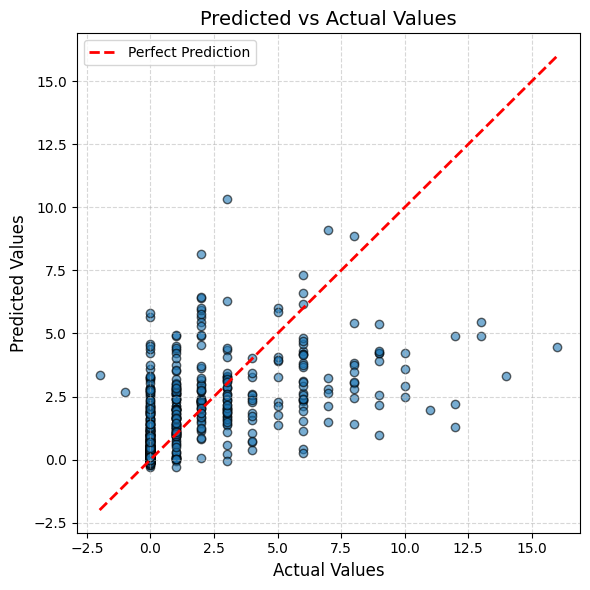

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6, edgecolor='k')

# Labels and formatting
plt.title("Predicted vs Actual Values", fontsize=14)
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)

# Reference line (perfect predictions)
lims = [min(y_test.min(), y_test_pred.min()), max(y_test.max(), y_test_pred.max())]
plt.plot(lims, lims, 'r--', lw=2, label='Perfect Prediction')

plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
test_df['target'].mean()

np.float64(3.4887640449438204)

In [ ]:
results_df.sort_values(by=['gameweek', 'test_rmse'])

model  gameweek  \
18  GradientBoostingRegressor         2   
21               XGBRegressor         2   
15      RandomForestRegressor         2   
27          CatBoostRegressor         2   
24              LGBMRegressor         2   
12                        KNN         2   
6                       Lasso         2   
0                  ElasticNet         2   
3                       Ridge         2   
9                         SVR         2   
22               XGBRegressor         3   
19  GradientBoostingRegressor         3   
28          CatBoostRegressor         3   
25              LGBMRegressor         3   
16      RandomForestRegressor         3   
10                        SVR         3   
13                        KNN         3   
1                  ElasticNet         3   
7                       Lasso         3   
4                       Ridge         3   
20  GradientBoostingRegressor         4   
23               XGBRegressor         4   
17      RandomForestRegressor         4   
29          CatBoostRegressor         4   
26              LGBMRegressor         4   
14                        KNN         4   
11                        SVR         4   
8                       Lasso         4   
2                  ElasticNet         4   
5                       Ridge         4   

                                          best_params   test_r2  test_rmse  \
18  {'model__learning_rate': 0.01597774786435076, ...  0.520020   3.775499   
21  {'model__learning_rate': 0.016962221594166126,...  0.516104   3.790866   
15  {'model__max_depth': 3, 'model__n_estimators':...  0.512819   3.803713   
27  {'model__depth': 3, 'model__iterations': 241, ...  0.497553   3.862850   
24  {'model__learning_rate': 0.045401641878176635,...  0.465591   3.983820   
12                          {'model__n_neighbors': 7}  0.449020   4.045114   
6               {'model__alpha': 0.10625459084029841}  0.174540   4.951201   
0   {'model__alpha': 0.10481315701873967, 'model__...  0.173553   4.954160   
3                 {'model__alpha': 8.565925757139402}  0.156211   5.005870   
9   {'model__C': 15.925169151603527, 'model__epsil... -1.340753   8.337588   
22  {'model__learning_rate': 0.29999999999999993, ...  0.580305   3.373606   
19  {'model__learning_rate': 0.01, 'model__max_dep...  0.541344   3.526721   
28  {'model__depth': 3, 'model__iterations': 280, ...  0.538450   3.537830   
25  {'model__learning_rate': 0.01327619158181911, ...  0.530980   3.566346   
16  {'model__max_depth': 3, 'model__n_estimators':...  0.509392   3.647497   
10  {'model__C': 23.038866459216415, 'model__epsil...  0.430152   3.931038   
13                         {'model__n_neighbors': 19}  0.404401   4.018876   
1   {'model__alpha': 0.07587882346174367, 'model__...  0.348564   4.203039   
7               {'model__alpha': 0.06505973033858296}  0.314224   4.312397   
4                              {'model__alpha': 10.0}  0.310841   4.323021   
20  {'model__learning_rate': 0.06394816988529078, ...  0.322647   3.134707   
23  {'model__learning_rate': 0.032913477110898294,...  0.309142   3.165804   
17  {'model__max_depth': 6, 'model__n_estimators':...  0.295117   3.197775   
29  {'model__depth': 3, 'model__iterations': 230, ...  0.284633   3.221469   
26  {'model__learning_rate': 0.01886227251162934, ...  0.273853   3.245650   
14                         {'model__n_neighbors': 20}  0.230371   3.341414   
11  {'model__C': 39.83070851882392, 'model__epsilo...  0.138293   3.535651   
8              {'model__alpha': 0.025361076690324343} -0.309106   4.357896   
2   {'model__alpha': 0.024252424431976775, 'model_... -0.309510   4.358569   
5                              {'model__alpha': 10.0} -0.321521   4.378512   

    test_mae  test_mape  
18  2.498285        inf  
21  2.478205        inf  
15  2.510934        inf  
27  2.564826        inf  
24  2.557502        inf  
12  2.570618        inf  
6   3.456125        inf  
0   3.457107        inf  
3   3.458413        inf  
9   7.36581

In [ ]:
min_rmse_rows = results_df.loc[results_df.groupby('gameweek')['test_rmse'].idxmin()]
min_rmse_rows['best_params'].iloc[-3]

OrderedDict({'model__learning_rate': 0.01597774786435076, 'model__max_depth': 3, 'model__n_estimators': 228})